<a href="https://colab.research.google.com/github/venomeh/Brain-Tumor-Classification/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets list


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:06<00:00, 20.4MB/s]
100% 149M/149M [00:06<00:00, 24.0MB/s]


In [ ]:
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:
def get_class_paths(path):
    classes=[]
    class_paths=[]

    # iterate through directories in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path,label)

        #check if its a directory
        if os.path.isdir(label_path):

            # iterate through images in the label directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path,image)

                # add a class and path to the respective lists
                classes.append(label)
                class_paths.append(image_path)

    # create a dataframe with the collected data
    df = pd.DataFrame({
        'Class Path':class_paths,
        'Class':classes
    })

    return df

In [ ]:
tr_df = get_class_paths('/content/Training')
tr_df

,Class Path,Class
0,/content/Training/meningioma/Tr-me_1245.jpg,meningioma
1,/content/Training/meningioma/Tr-me_0590.jpg,meningioma
2,/content/Training/meningioma/Tr-me_0153.jpg,meningioma
3,/content/Training/meningioma/Tr-me_0130.jpg,meningioma
4,/content/Training/meningioma/Tr-me_0024.jpg,meningioma
...,...,...
5707,/content/Training/pituitary/Tr-pi_1392.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_1049.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0248.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_0790.jpg,pituitary


In [ ]:
ts_df = get_class_paths('/content/Testing')
ts_df

,Class Path,Class
0,/content/Testing/meningioma/Te-me_0208.jpg,meningioma
1,/content/Testing/meningioma/Te-me_0151.jpg,meningioma
2,/content/Testing/meningioma/Te-me_0046.jpg,meningioma
3,/content/Testing/meningioma/Te-me_0112.jpg,meningioma
4,/content/Testing/meningioma/Te-me_0034.jpg,meningioma
...,...,...
1306,/content/Testing/pituitary/Te-pi_0140.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0011.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0269.jpg,pituitary
1309,/content/Testing/pituitary/Te-piTr_0007.jpg,pituitary


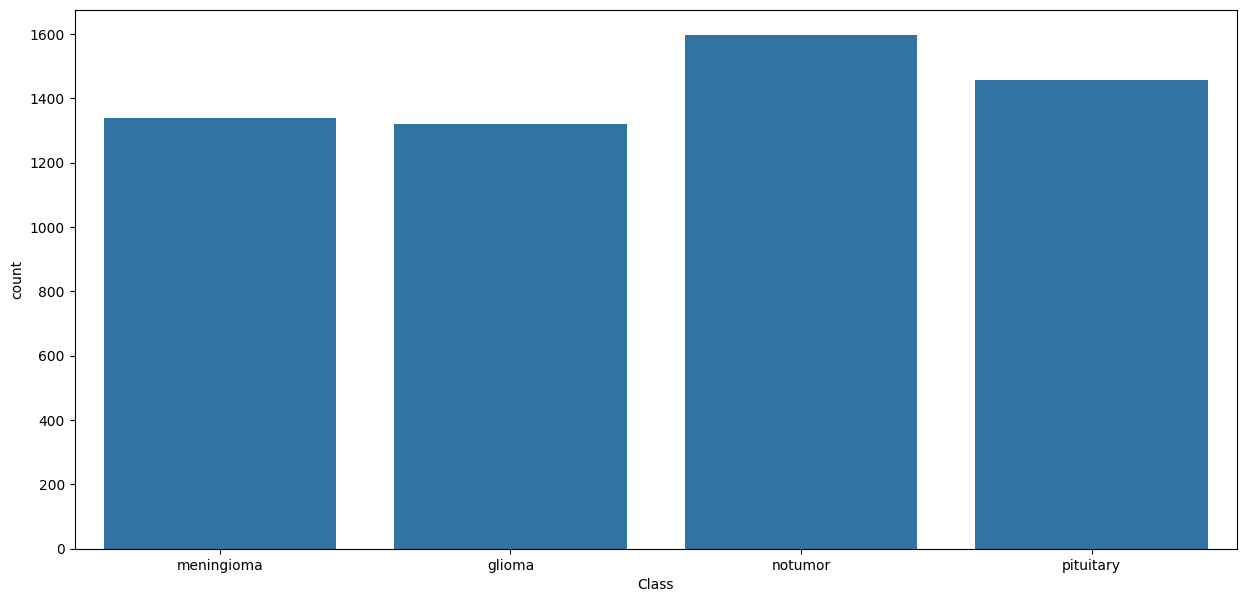

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

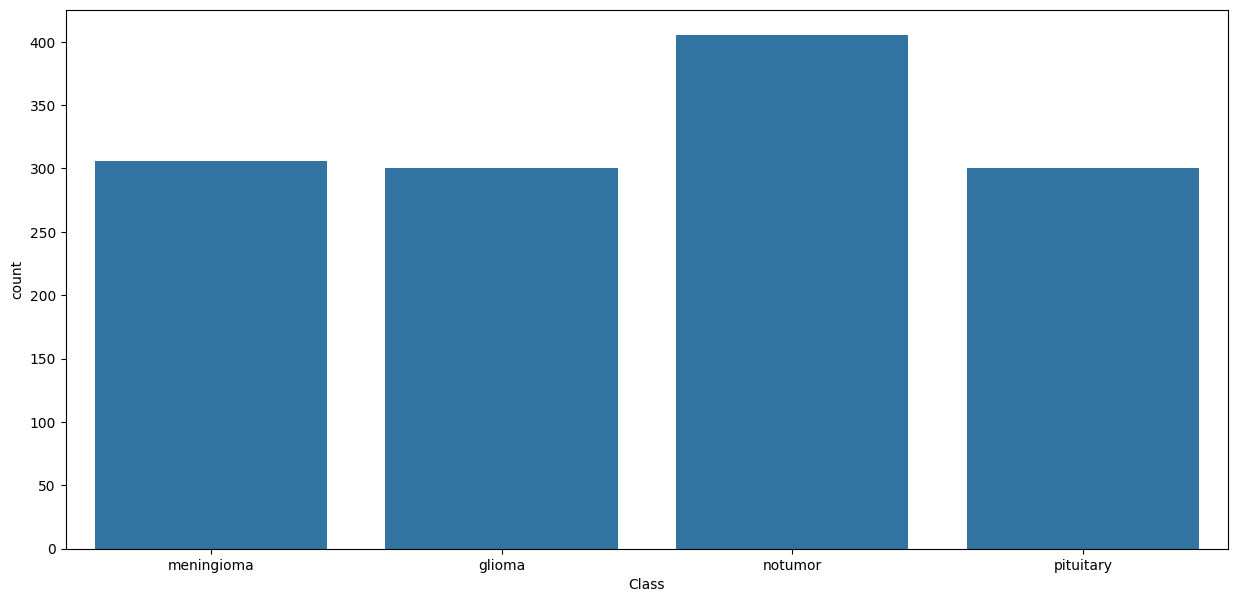

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential # allows to build NN layer by layer
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
308,/content/Testing/glioma/Te-gl_0111.jpg,glioma
167,/content/Testing/meningioma/Te-me_0056.jpg,meningioma
802,/content/Testing/notumor/Te-no_0128.jpg,notumor
1061,/content/Testing/pituitary/Te-pi_0114.jpg,pituitary
290,/content/Testing/meningioma/Te-me_0301.jpg,meningioma
...,...,...
41,/content/Testing/meningioma/Te-me_0064.jpg,meningioma
219,/content/Testing/meningioma/Te-me_0067.jpg,meningioma
794,/content/Testing/notumor/Te-no_0046.jpg,notumor
853,/content/Testing/notumor/Te-no_0385.jpg,notumor


In [ ]:
ts_df

,Class Path,Class
413,/content/Testing/glioma/Te-gl_0180.jpg,glioma
185,/content/Testing/meningioma/Te-meTr_0006.jpg,meningioma
623,/content/Testing/notumor/Te-no_0073.jpg,notumor
548,/content/Testing/glioma/Te-gl_0261.jpg,glioma
525,/content/Testing/glioma/Te-glTr_0007.jpg,glioma
...,...,...
1088,/content/Testing/pituitary/Te-pi_0225.jpg,pituitary
1022,/content/Testing/pituitary/Te-pi_0072.jpg,pituitary
436,/content/Testing/glioma/Te-gl_0033.jpg,glioma
81,/content/Testing/meningioma/Te-me_0149.jpg,meningioma


# PreProcessing

In [ ]:
batch_size = 32

img_size = (299,299)  # puts all images to 299 by 299 pixels

image_generator = ImageDataGenerator(rescale=1/255,brightness_range=(0.8,1.2)) # it scales the images from 0-255 to 0-1 for better understanding by model. and brightness range is applied randomly

ts_gen = ImageDataGenerator(rescale=1/255) # we wont have random brightness on the testing data

# now we can use these generators to get 3 flows
# 1- training
# 2- validation
# 3- testing



> Training



In [ ]:
tr_gen = image_generator.flow_from_dataframe(tr_df,
                                             x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df,
                                             x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df,
                                    x_col='Class Path',
                                    y_col='Class',
                                    batch_size=16,
                                    target_size=img_size,
                                    shuffle=False
                                    ) # we set shuffle to false because we want to conserve the order of the data


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


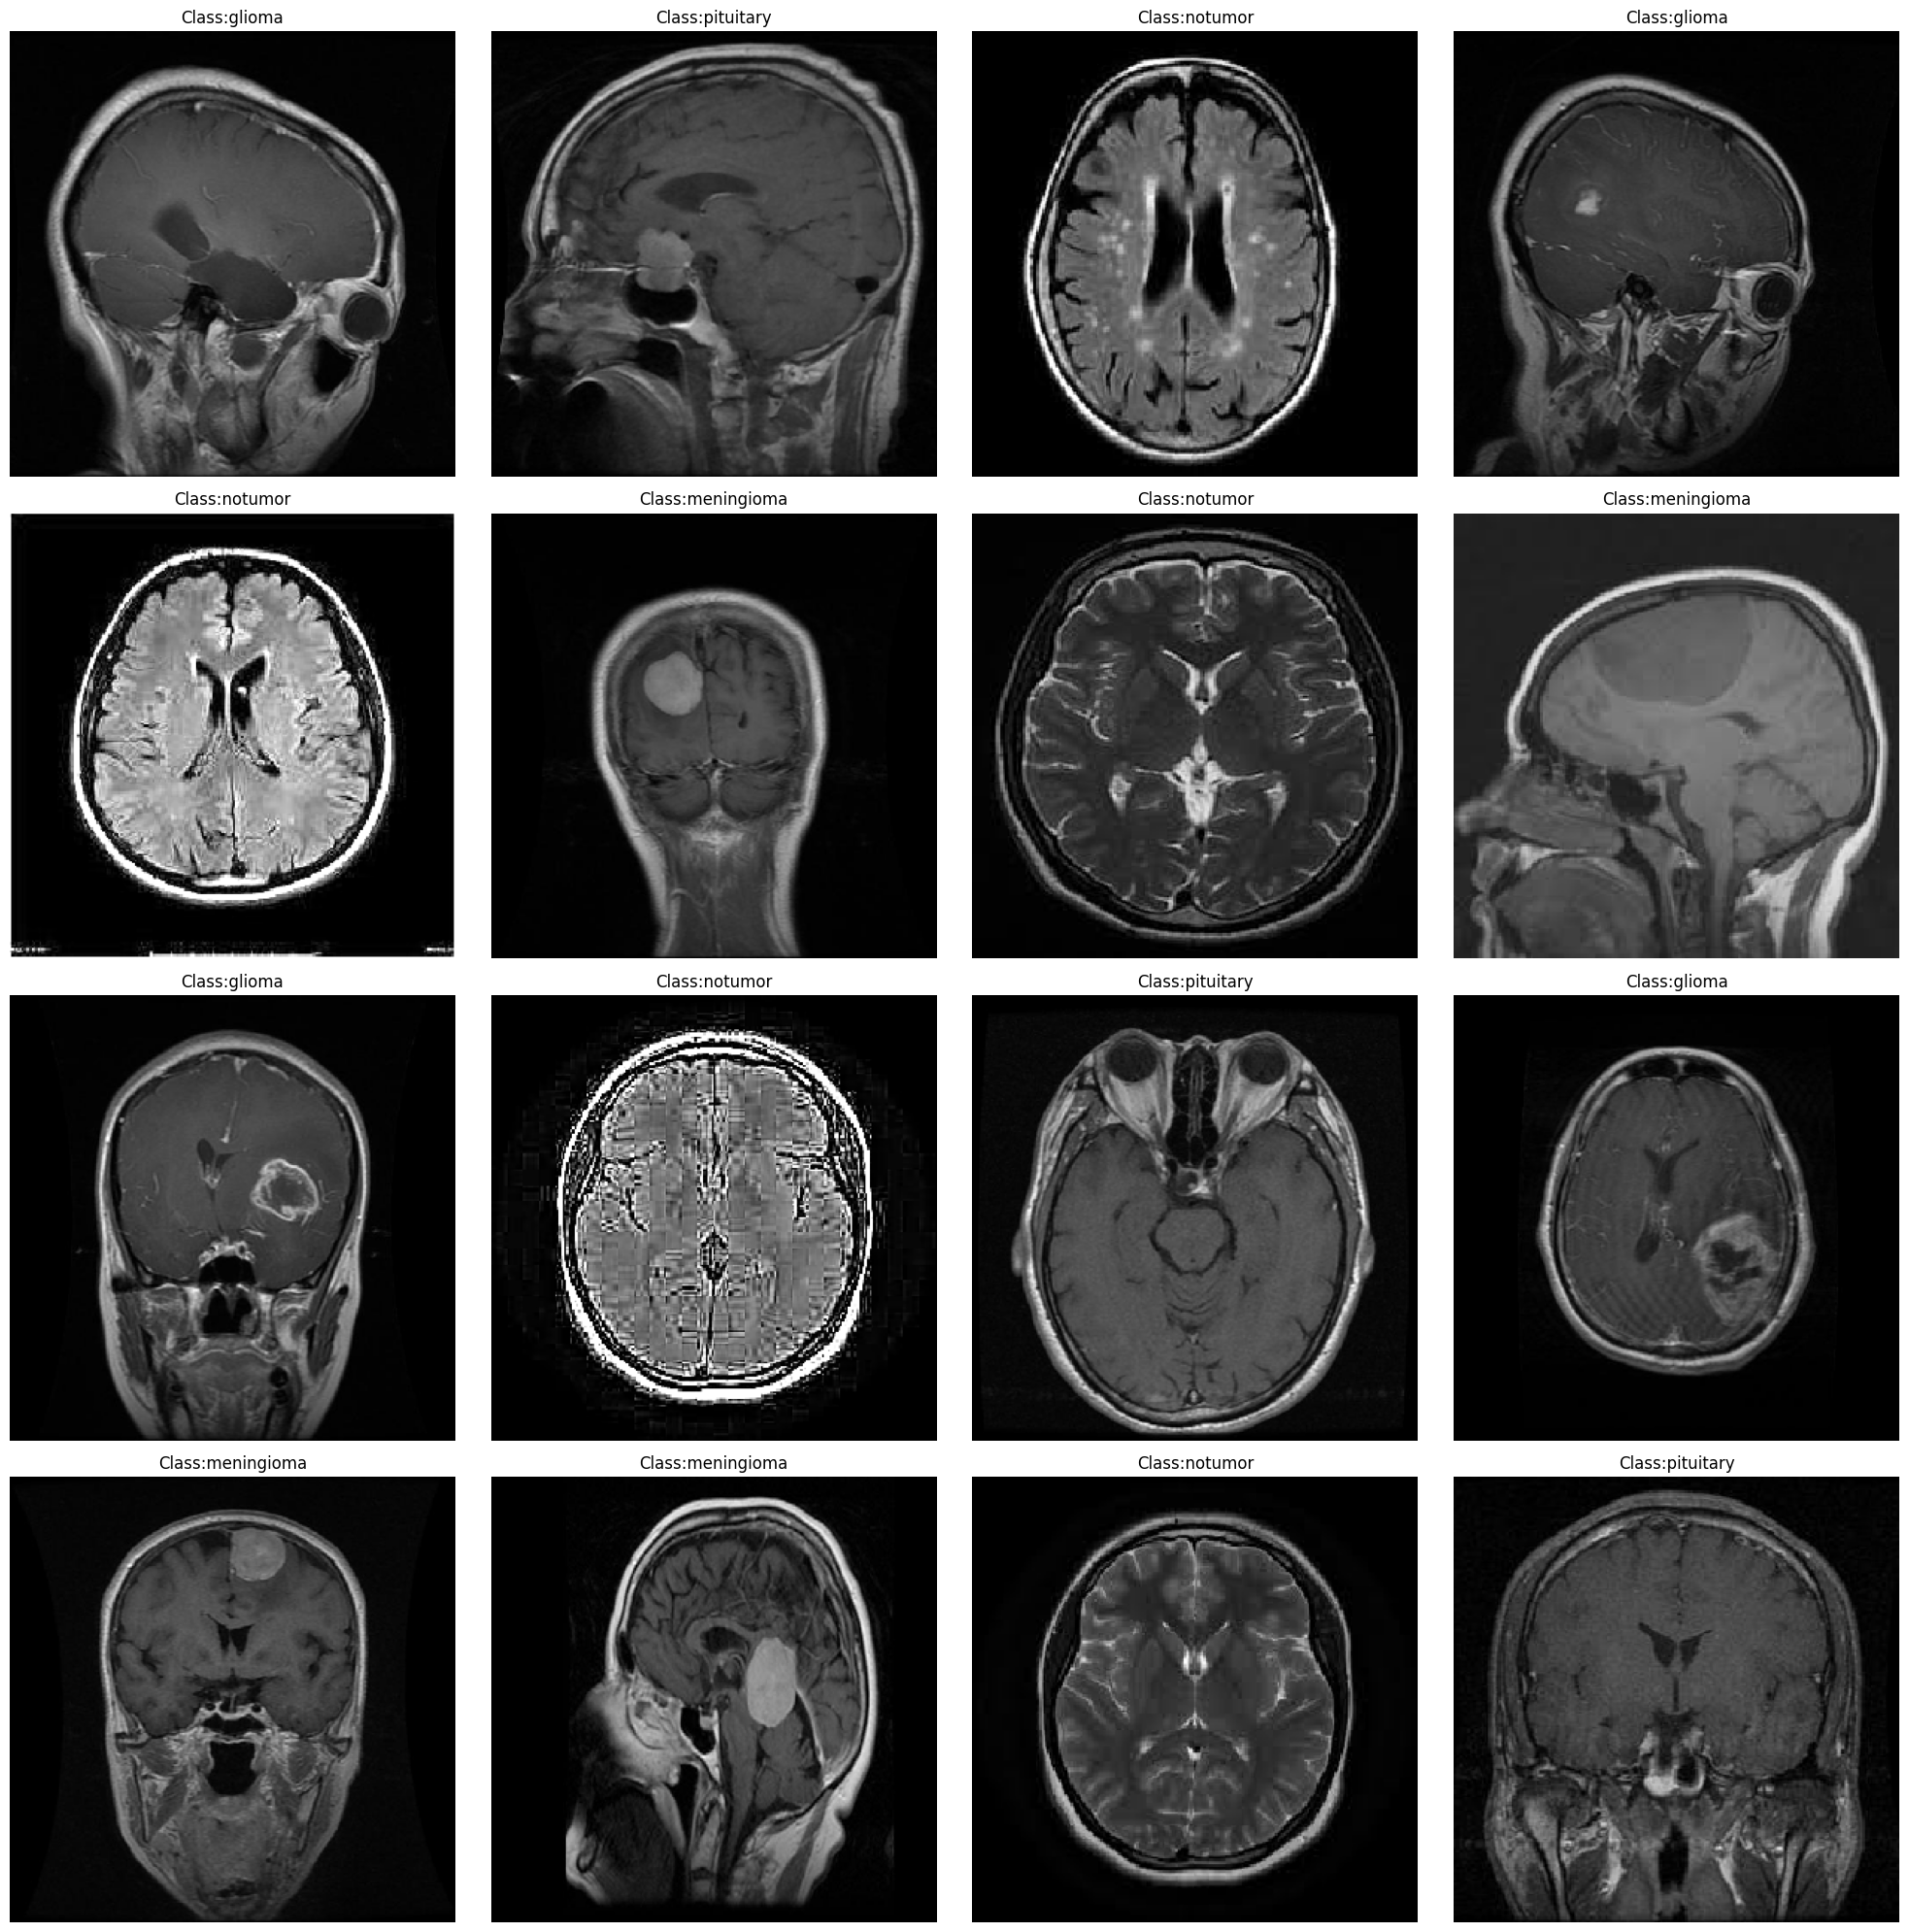

In [ ]:
plt.figure(figsize=(20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    batch=next(tr_gen)
    image=batch[0][0]
    label=batch[1][0]
    plt.imshow(image)

    class_index = np.argmax(label)

    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    index_position = class_indices.index(class_index)

    class_name = class_names[index_position]

    plt.title(f"Class:{class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
img_shape = (299,299,3) # 3 for RGB

# xception model
base_model = tf.keras.applications.Xception(include_top=False,
                                           weights='imagenet',
                                           input_shape=img_shape,
                                           pooling='max')  # max is used to get the most prominent change out of the data hence its useful in the case of brain tumor

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128,activation='relu'),
    Dropout(rate=0.25),
    Dense(4,activation='softmax')
])   # we used the base Xception model and added the layers to it for our own use. softmax get the probability dist with the total beign 100 and the most goes to the one that the model thinks to be right. relu helps the model learn non-linear relationships between the input and the output

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=[
                  'accuracy',
                  Precision(),
                  Recall()
              ]) # adamax adjusts the learning rate dynamically to get the best out of the model

In [ ]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.8103 - loss: 0.5583 - precision: 0.8509 - recall: 0.7454 - val_accuracy: 0.9313 - val_loss: 0.3629 - val_precision: 0.9313 - val_recall: 0.9313
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 162s 746ms/step - accuracy: 0.9777 - loss: 0.0707 - precision: 0.9791 - recall: 0.9765 - val_accuracy: 0.9832 - val_loss: 0.0724 - val_precision: 0.9832 - val_recall: 0.9817
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 148s 776ms/step - accuracy: 0.9951 - loss: 0.0188 - precision: 0.9953 - recall: 0.9946 - val_accuracy: 0.9695 - val_loss: 0.0979 - val_precision: 0.9708 - val_recall: 0.9649
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 135s 747ms/step - accuracy: 0.9949 - loss: 0.0207 - precision: 0.9949 - recall: 0.9948 - val_accuracy: 0.9863 - val_loss: 0.0637 - val_precision: 0.9863 - val_recall: 0.9863
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 136s 748ms/step - accuracy: 0.9956 - loss: 0.0125 - precision: 0.9960 - recall: 0.9956 - val_accuracy: 0.9664 - val_loss: 

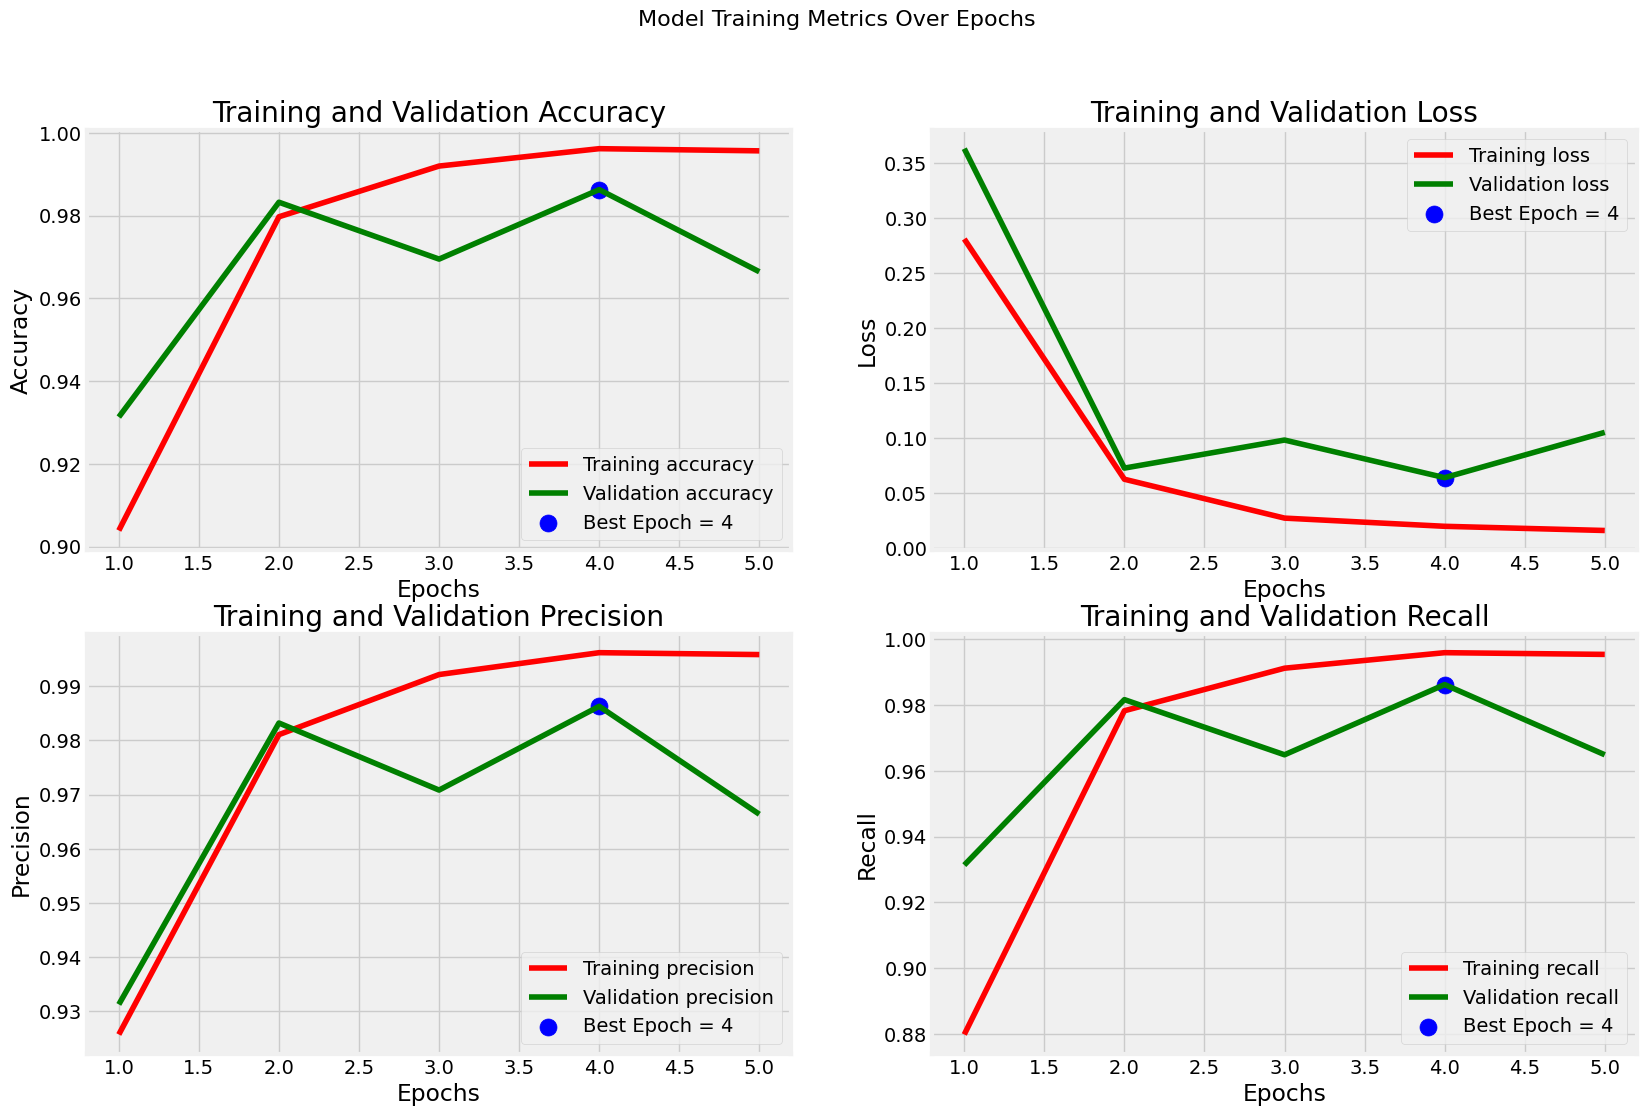

In [ ]:
# getting training and validation metrics form history
metrics = ['accuracy','loss','precision','recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# find the best epochs and values
best_epochs={}
best_values={}

for m in metrics:
    if m == 'loss':
        idx=np.argmin(val_metrics[m])
    else:
        idx=np.argmax(val_metrics[m])
    best_epochs[m] = idx+1
    best_values[m] = val_metrics[m][idx]

# plot metrics
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics,1):
    plt.subplot(2,2,i)

    epochs = range(1 , len(tr_metrics[metric]) + 1)

    plt.plot(epochs,tr_metrics[metric],'r',label=f'Training {metric}')
    plt.plot(epochs,val_metrics[metric],'g',label=f'Validation {metric}')

    plt.scatter(best_epochs[metric],best_values[metric],s=150,c='blue',label=f'Best Epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs',fontsize=16)
plt.show()


In [ ]:
train_score = model.evaluate(tr_gen,verbose=1)
valid_score = model.evaluate(valid_gen,verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f'train accuracy : {train_score[1]*100:.2f}%')
print(f'train loss: {train_score[0]:.4f}')

print(f'\n\n validation accuracy : {valid_score[1]*100:.2f}%')
print(f'validation loss: {valid_score[0]:.4f}')

print(f'\n\n test accuracy : {test_score[1]*100:.2f}%')
print(f'test loss: {test_score[0]:.4f}')

179/179 ━━━━━━━━━━━━━━━━━━━━ 44s 242ms/step - accuracy: 0.9930 - loss: 0.0208 - precision: 0.9932 - recall: 0.9928
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.9576 - loss: 0.1006 - precision: 0.9576 - recall: 0.9576
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.9375 - loss: 0.0779 - precision: 0.9375 - recall: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9851 - loss: 0.0345 - precision: 0.9851 - recall: 0.9851
train accuracy : 99.23%
train loss: 0.0228


 validation accuracy : 96.49%
validation loss: 0.1079


 test accuracy : 98.48%
test loss: 0.0445


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step


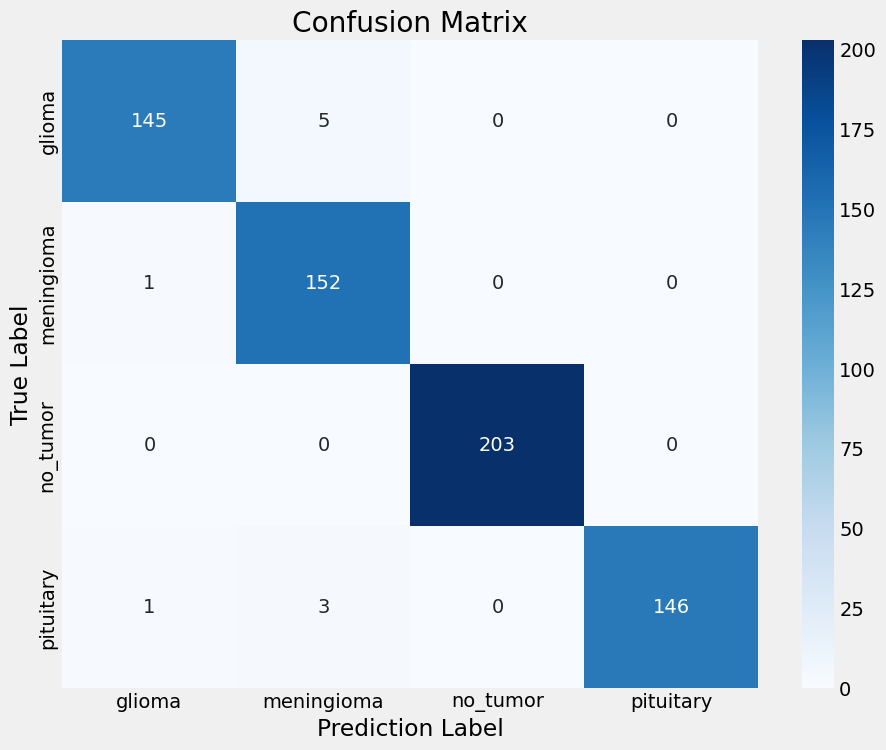

In [ ]:
preds = model.predict(ts_gen) # makes predcitions on the testing data using the model we trained before
# preds is a 2d array containing each image row wise and the 4 classes and columns and its prediction lies in its indexes


y_pred = np.argmax(preds, axis=1) # gets the best prediction out of the preds


# this is used for mapping the categorical data to numerical for CM
class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}


cm = confusion_matrix(ts_gen.classes, y_pred) # confusion_matrix = (true_labels, predicted_labels)
labels = list(class_dict.keys())
label_names = list(class_dict.values())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names , yticklabels=label_names)
plt.xlabel('Prediction Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image

def predict(img_path: str)->None:
    # get class labels
    labels = list(class_dict.keys())

    # create figure
    plt.figure(figsize=(6,8))

    # load and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((299,299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0)/255.0

    # get model pred
    predictions = model.predict(img_array) # 2d
    probabilities = list(predictions[0]) # max from row , [0]

    # get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # plot original img
    plt.subplot(2,1,1)
    plt.imshow(resized_img)
    plt.title(f"input MRI Image\nPredicted : {predicted_class}")

    # plot prediction probabilities
    plt.subplot(2,1,2)
    bars=plt.barh(labels,probabilities)
    plt.xlabel('Probability',fontsize=15)
    plt.title('Class Probabilities')

    # add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars,fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted Tumor type : {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


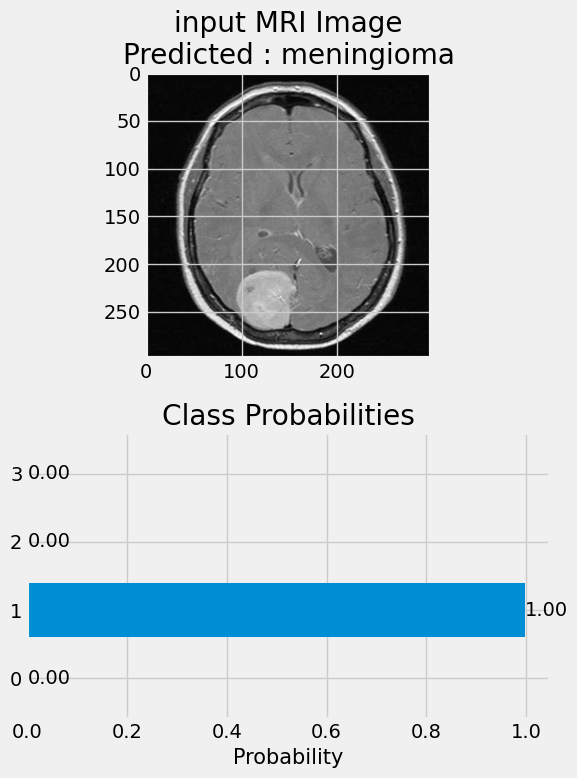


Predicted Tumor type : meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-me_0010.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

# here concludes the XCEPTION MODEL WITH TRANSFER LEARNING
# we got a pretrained model and added a few layers of our own to train it and got the results

# Now we are going to train a smaller model from scratch to see if we can achieve a great amount of accuracy or not

# CNN

the question is that can we use a smaller model with much less layers then those of xception (36) and have the same accuracy ? cuz itll be less expensive to run.
xception : 36 layers, 21 mil param, 99% acc
custom CNN : 4 Layers, 4.7 mil param, 90+% acc

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [ ]:
batch_size = 16

img_size = (224,224)  # puts all images to 224 by 224 pixels

## IF WE GO ABOVE THE MENTIONED VALUES(ABOVE), WE'LL JUST RUN OUT OF GPU AND MEMORY IN COLLAB

image_generator = ImageDataGenerator(rescale=1/255,brightness_range=(0.8,1.2)) # it scales the images from 0-255 to 0-1 for better understanding by model. and brightness range is applied randomly

ts_gen = ImageDataGenerator(rescale=1/255) # we wont have random brightness on the testing data


tr_gen = image_generator.flow_from_dataframe(tr_df,
                                             x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df,
                                             x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df,
                                    x_col='Class Path',
                                    y_col='Class',
                                    batch_size=16,
                                    target_size=img_size,
                                    shuffle=False
                                    ) # we set shuffle to false because we want to conserve the order of the data


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


# Create a SEQUENTIAL MODEL

In [ ]:
cnn_model = Sequential()

#convolution layers
cnn_model.add(Conv2D(512,(3,3), padding='same', input_shape=(224,224,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))


# flatten output for fully connected layers
cnn_model.add(Flatten())

# fully connected layers
cnn_model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.L2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4,activation='softmax')) #output layer with 4 neurons and 4 classes

#compile the model
cnn_model.compile(
    Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        Precision(),
        Recall()
    ]
)

#display model summary
cnn_model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 149s 343ms/step - accuracy: 0.5740 - loss: 2.1745 - precision: 0.7057 - recall: 0.3947 - val_accuracy: 0.7710 - val_loss: 0.8210 - val_precision: 0.7937 - val_recall: 0.7344
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 105s 293ms/step - accuracy: 0.8117 - loss: 0.7308 - precision: 0.8330 - recall: 0.7852 - val_accuracy: 0.8321 - val_loss: 0.6134 - val_precision: 0.8448 - val_recall: 0.8061
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 105s 293ms/step - accuracy: 0.8477 - loss: 0.5530 - precision: 0.8667 - recall: 0.8343 - val_accuracy: 0.8687 - val_loss: 0.4911 - val_precision: 0.8732 - val_recall: 0.8519
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 145s 301ms/step - accuracy: 0.8991 - loss: 0.4368 - precision: 0.9047 - recall: 0.8876 - val_accuracy: 0.8977 - val_loss: 0.4301 - val_precision: 0.9008 - val_recall: 0.8870
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 140s 294ms/step - accuracy: 0.9234 - loss: 0.3576 - precision: 0.9270 - recall: 0.9138 - val_accuracy: 0.9191 - val_los

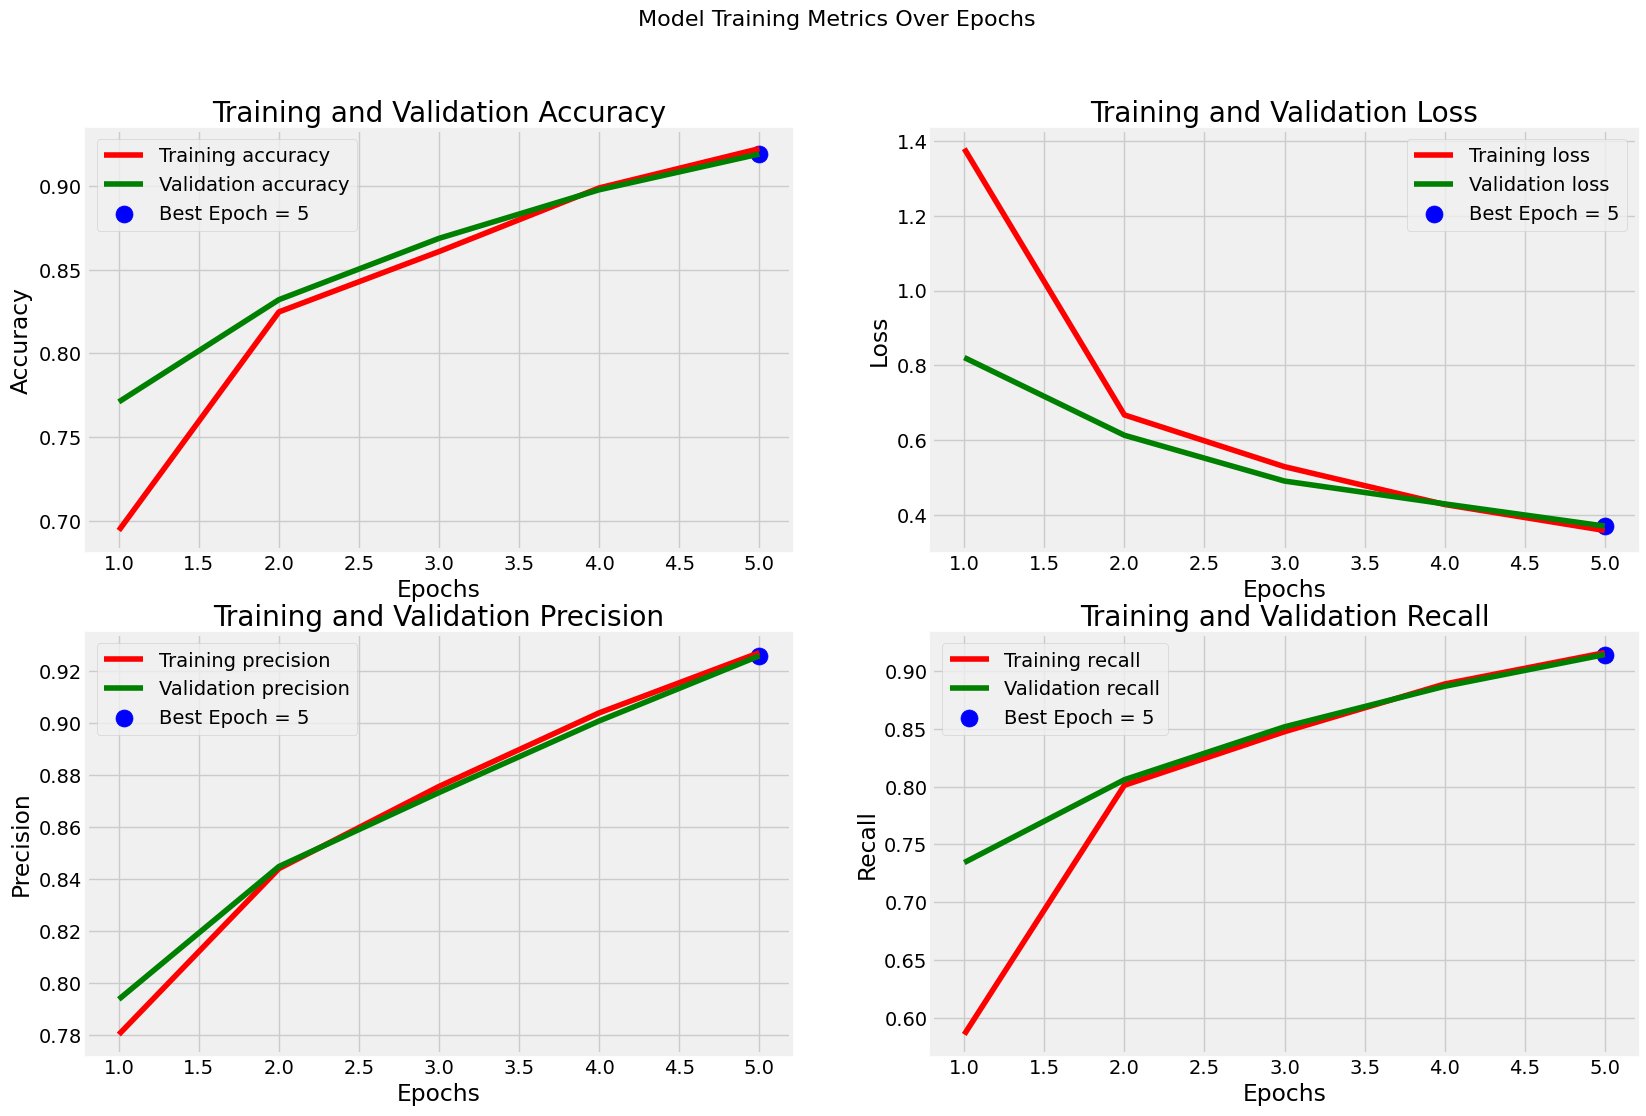

In [ ]:
# getting training and validation metrics form history
metrics = ['accuracy','loss','precision','recall']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# find the best epochs and values
best_epochs={}
best_values={}

for m in metrics:
    if m == 'loss':
        idx=np.argmin(val_metrics[m])
    else:
        idx=np.argmax(val_metrics[m])
    best_epochs[m] = idx+1
    best_values[m] = val_metrics[m][idx]

# plot metrics
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics,1):
    plt.subplot(2,2,i)

    epochs = range(1 , len(tr_metrics[metric]) + 1)

    plt.plot(epochs,tr_metrics[metric],'r',label=f'Training {metric}')
    plt.plot(epochs,val_metrics[metric],'g',label=f'Validation {metric}')

    plt.scatter(best_epochs[metric],best_values[metric],s=150,c='blue',label=f'Best Epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs',fontsize=16)
plt.show()


In [ ]:
train_score = cnn_model.evaluate(tr_gen,verbose=1)
valid_score = cnn_model.evaluate(valid_gen,verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f'train accuracy : {train_score[1]*100:.2f}%')
print(f'train loss: {train_score[0]:.4f}')

print(f'\n\n validation accuracy : {valid_score[1]*100:.2f}%')
print(f'validation loss: {valid_score[0]:.4f}')

print(f'\n\n test accuracy : {test_score[1]*100:.2f}%')
print(f'test loss: {test_score[0]:.4f}')

357/357 ━━━━━━━━━━━━━━━━━━━━ 28s 77ms/step - accuracy: 0.9581 - loss: 0.2893 - precision: 0.9618 - recall: 0.9530
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9078 - loss: 0.3919 - precision: 0.9095 - recall: 0.9021
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.8750 - loss: 0.4542 - precision: 0.8750 - recall: 0.8750

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9167 - loss: 0.3721 - precision: 0.9235 - recall: 0.9087
train accuracy : 95.68%
train loss: 0.2893


 validation accuracy : 91.45%
validation loss: 0.3723


 test accuracy : 91.62%
test loss: 0.3818


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step


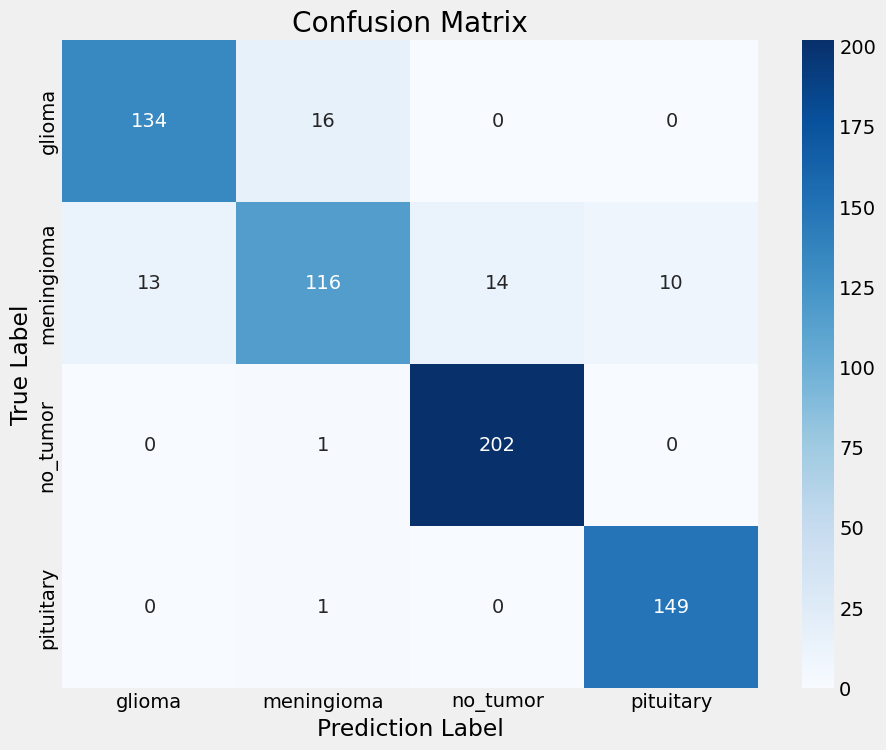

In [ ]:
preds = cnn_model.predict(ts_gen) # makes predcitions on the testing data using the model we trained before
# preds is a 2d array containing each image row wise and the 4 classes and columns and its prediction lies in its indexes


y_pred = np.argmax(preds, axis=1) # gets the best prediction out of the preds


# this is used for mapping the categorical data to numerical for CM
class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}


cm = confusion_matrix(ts_gen.classes, y_pred) # confusion_matrix = (true_labels, predicted_labels)
labels = list(class_dict.keys())
label_names = list(class_dict.values())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names , yticklabels=label_names)
plt.xlabel('Prediction Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       150
           1       0.87      0.76      0.81       153
           2       0.94      1.00      0.96       203
           3       0.94      0.99      0.96       150

    accuracy                           0.92       656
   macro avg       0.91      0.91      0.91       656
weighted avg       0.91      0.92      0.91       656



In [ ]:
cnn_model.save("cnn_model.h5")

# Part 2 : Web App (Streamlit)

In [ ]:
pip install streamlit pyngrok python-dotenv

In [ ]:
import os
from threading import Thread

In [ ]:
from pyngrok import ngrok
from google.colab import userdata

In [ ]:
ngrok_token=userdata.get("NGROK_AUTH_TOKEN")

In [ ]:
ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():
    os.system("streamlit run /content/app.py --server.port 8500")

# APP.py

In [ ]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
#from google.collab import userdata
import PIL.Image
import os
import google.generativeai as genai
from dotenv import load_dotenv
load_dotenv()


genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)



def generate_explanation(img_path, model_prediction, confidence):
    prompt=f"""As an expert neuroradiologist specializing in brain tumor diagnosis, analyze this brain MRI scan and its corresponding saliency map visualization.

Clinical Context:
- The deep learning model has classified this as a {model_prediction} with {confidence*100:.1f}% confidence
- The bright regions in the saliency map indicate areas the model considered most significant for its diagnosis

Please provide a detailed analysis including:

1. Anatomical Analysis:
- Identify the specific brain regions and anatomical structures highlighted in the visualization
- Note any visible mass effects, tissue changes, or structural abnormalities in these regions

2. Diagnostic Reasoning:
- Explain how the highlighted regions align with typical {model_prediction} presentation
- Describe the characteristic imaging features of {model_prediction} that may be present
- Discuss whether the model's focus areas are clinically relevant for this type of tumor

3. Clinical Correlation:
- Comment on whether the model's attention areas match typical radiological findings for {model_prediction}
- Note any additional regions that might warrant attention
- Assess if the model's confidence level appears justified based on the visible features

Please provide your analysis in clear, professional medical language, focusing on the radiological evidence visible in the scan and highlighted regions.

    lets think step-by-step about this. Verify step-by-step.
    """


    img = PIL.Image.open(img_path)

    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model.generate_content([prompt,img])

    return response.text


def generate_saliency_map(model, img_array, class_index, img_size):
    img_tensor = tf.convert_to_tensor(img_array)

    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[0][class_index]

    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis = -1)
    gradients = gradients.numpy().squeeze()

    # resize gradients to match original image size
    gradients = cv2.resize(gradients,img_size)

    # create a circular mask for the brain area
    center = (gradients.shape[0] // 2 , gradients.shape[1] // 2)
    radius = min(center[0], center[1]) - 10
    y,x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0])**2 + (y-center[1])**2 <= radius**2

    # apply mask to gradients
    gradients = gradients * mask

    # Normalize only the brain area
    brain_gradients = gradients[mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
    gradients[mask] = brain_gradients

    # apply a higher threshold
    threshold = np.percentile(gradients[mask],80)
    gradients[gradients < threshold] = 0

    # apply more aggresive smoothing
    gradients = cv2.GaussianBlur(gradients, (11,11), 0)

    # create a heatmap overlay with enhanced contrast
    heatmap = cv2.applyColorMap(np.uint8(255*gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, img_size)

    # superimpose the heatmap on original image with increased opacity
    original_img = image.img_to_array(img)
    superimposed_img = heatmap*0.7 + original_img*0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    img_path = os.path.join(output_dir , uploaded_file.name)
    with open(img_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    saliency_map_path = f"saliency_maps/{uploaded_file.name}"

    # save the saliency map
    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img







def load_xception_model(model_path):

    img_shape=(299,299,3)

    base_model = tf.keras.applications.Xception(
        include_top=False,
        weights="imagenet",
        input_shape=img_shape,
        pooling='max',
    )

    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(4, activation='softmax')
    ])

    model.build((None,) + img_shape)

    #compile the model
    model.compile(
        Adamax(learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=[
            "accuracy",
            Precision(),
            Recall()
        ]
    )
    model.load_weights(model_path)

    return model







st.title("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("choose an image ...", type=["jpg","jpeg","png"])

if uploaded_file is not None:

    selected_model = st.radio(
        "select model: ",
        ["transfer learning - Xception", "custom cnn"]
    )

    if selected_model == "transfer learning - Xception":
        model = load_xception_model("/content/xception_model.weights.h5")
        img_size=(299,299)
    else:
        model = load_model("/content/cnn_model.h5")
        img_size=(224,224)

    labels = ["Glioma", "Meningioma", "No tumor", "Pituitary"]
    img = image.load_img(uploaded_file, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0 # so the pixel values are between 0,1

    prediction = model.predict(img_array) # this fn will chose the max prob out of the [1,2,3,4] it gives

    # get the class with the highest probability
    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    st.write(f"Predicted Class : {result}")

    st.write("Predictions: ")

    for label, prob in zip(labels,prediction[0]):
        st.write(f"{label}: {prob:.4f}")

    saliency_map = generate_saliency_map(
        model,
        img_array,
        class_index,
        img_size
    )

    col1, col2 = st.columns(2)

    with col1:
        st.image(
            uploaded_file,
            caption = "Uploaded image",
            use_container_width=True
        )

    with col2:
        st.image(
            saliency_map,
            caption="Saliency Map",
            use_container_width=True
        )


    saliency_map_path = f"saliency_maps/{uploaded_file.name}"
    explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

    st.write("### Explanation")
    st.write(explanation)




Overwriting app.py


# Separating through a thread so that main streamlit execution is separated from the collab environment

In [ ]:
thread = Thread(target=run_streamlit)
thread.start()

# the following give the url from ngrok on which our streamlit server is running.

In [ ]:
public_url = ngrok.connect(addr='8500', proto='http', bind_tls=True)

print("public URL: ", public_url)

public URL:  NgrokTunnel: "https://6e97-35-221-164-68.ngrok-free.app" -> "http://localhost:8500"


# to remove the channels that Ngrok has (it supports 3 at a time)

In [ ]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
    #print(f"closing tunnel : {tunnel.public_url} -> {tunnel.config["addr"]}")
    ngrok.disconnect(tunnel.public_url)